**Name Lists:**  
1. Gorramuth Prasertkull 6280632
2. Krittin Nisunarat 6280782

In [2]:
%matplotlib inline
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.stats import norm


## Option Pricing
Let us first establish the assumptions involved in pricing options.

The price of an option consists of the following components:
\
\
$$Option \ price = Intrinsic \ value + Time \ value$$
\
\
Let us define intrinsic value. The intrinsic value of an option is the value of an option at the current moment where for each option type is defined by:
\
\
$$
Call \ option = Current \ stock \ price -Strike \ price \\
Put \ option =  Strike \ price - Current \ stock  \ price
$$
\
\
This is the measure of a current worth of a stock. For instance if a stock is worth 110 baht and its call option strike price is worth 100 baht. This option's intrinsic value is 10 baht since that's the currently realized profit made if you sell the option at that time. Conversely, if the option is worth 110 and the stock is worth 100, then the option's intrinsic value will be worth -10 baht, and in terms of intrinsic value worth 0 baht, since the option is not profitable.
\
\
The time value component of the option however is the premium added to the option based on the contract's timeframe and volatility. Why is that the case? Let us examine these factors.
\
\
More volatility (standard deviation) associated with the stock, therefore there is a higher chance for a price swing which can increase the profit of the options massively. This takes into account of the fact that should the price swing in undesirable direction of the contract type, the ultimate value of the stock would not be a loss but simple 0 baht since you could simply choose to not use your option. However, the potential for gain if the price swings favoriable is positive, which is why there is a premium for the stock's volatility.
\
\
The timeframe of the stock also contributes to its time value in a sense that a longer timeframe allows for greater price fluctuation and a potential to realize much more profit at a later date. As the timeframe of an option decreases, the time value decreases and the option price falls closer to its intrinsic value.
\
\
Now, let us move on to a very important concept that is very important to both of the pricing models used here.
This concept is called "portfolio replication". Consider a stock worth 100 baht today. You buy a call option for your portfolio with a strike price of 105 baht and a duration of 1 year (meaning that if the stock price rises above that, you profit by stock price-strike price).
\
\
After 1 year passed, the option price could potentially rise to 110 or fall to 90. If it rises to 110, you gain 5 baht. If it falls to 90, you lose 0 baht (because you won't exercise your option).
This example can also be created another portfolio, a portfolio with the same stock plus a debt of 85.71 baht at 5% interest due at the end of the year (90 baht due). If the stock price falls to 90, you can sell it to pay off the debt resulting in a 0 baht profit. However if the stock price rises to 110 baht , you can sell it to pay off the now 90 baht debt for a profit of 20 baht.
\
\
Since you borrowed 85.71 baht, you must finance 14.29 baht by yourself to buy a 100 baht stock.
\
\
Now for 14.29 baht you can either profit by 20 or 0
For a call option you can also profit by 5 or 0. Therefore, you would need 4 call options at a certain price to profit by 20 which will result in the same payout as the debt and stock portfolio.
From this we have 4$\times$Call option = 14.20 baht. Thus, a call option would then cost 3.55 baht.
\
\
Using this method you could form a portfolio without any risk by buying a stock and issuing(selling call options) 4 options at strike 105.
If the stock price falls to 90 baht, the buyer of your option won't exercise their option so you won't make any losses. Your net income is 90 baht.
If the stock price rises to 110 baht, the buyer of your option will use their option and you will be forced to sell 4 110 options for 105, "losing out" on 20 baht worth of profit, which is negated by your 110 baht worth of stock. Resulting in 90 baht.
\
\
As we can see, it is possible be completely risk-free with options, it follows that risk is not a factor in pricing options contract since it can be replicated completely risk-free.
\
\
We can conclude that investors will not be risk averse or demand any risk premium alongside the risk-free rate, which is where we arrive at what is called a risk-neutral probability where we can use risk-free rate to discount our option payoff price to value our options.
\
\
We will examine two of the models used to price options, one of which relies on the monte carlo simulation numerical method.

## Black Scholes Model (BSM)
\
The Black Scholes Model is a mathematical model for pricing an options contract
which estimates the variation over the time of financial instruments of the 
specific stocks. BSM assumption will have a lognormal distribution pf prices
following a random walk with constant drift and volality. the require constants
for the Black Scholes Model formula are strike price, volatility, the 
underlying asset, time, and the risk-free interest rate. the model assumes the 
price of heavily traded assets follows a Geomatric Brownian Motion in the ways 
that the model incoporates the cinstant price variation of the stock, the time 
value of money, the options's strike price, and the time to the option's expiry.
\
\
**Certain assumptions with Black Scholes Model:** \
1. No dividend are paid out during the life of the option
2. Market is efficient in the way that the movement can not be predicted
3. no transaction costs in buying the option
4. the risk-free rate and volatility of the underlying as known and constant
5. the returns on the underlying asset are log-normally distributed

**Formula:** \
in term of mathematical formula, it is calculated by multiplying the stock price by the cumulatice standard notmal probability distribution function. 
The net present value or NPV of the strike price multiplied by the cumulative standard normal distribution is subtracted from the resulted value of the previous calculation which is the formula below.
\
\
$$
\large{C = S_tN(d_1) - Ke^{-rt}N(d_2)}
$$
\
which: \
$$
d_1 = \frac{ln(\frac{S_t}{K}) + (r + \frac{\sigma_v^2}{2}t)}{\sigma_s \sqrt(t)} \\
d_2 = d_1 - \sigma \sqrt(t)
$$
\
where: \
C = Call option price \
S = Current stock price \
K = strike price \
r = Riak-free interest rate \
t = Time to maturity \
N = normal distribution
\
\


In [3]:
# European Option pricing models
# In this project we will analyze the 2 most commonly used option pricing models
# and the application of Monte Carlo Simulation in option pricing

# Black Scholes for call options
def blackScholes(stockPrice,strikePrice,interest,sd,TTM):
  d1=(np.log(stockPrice/strikePrice)+(interest+(sd**2/2))*TTM)/(sd*(TTM**0.5))
  d2=d1-sd*(TTM**0.5)
  dist1=norm.cdf(d1)
  dist2=norm.cdf(d2)
  return stockPrice*dist1-dist2*strikePrice*np.exp(-interest*TTM)

# Black Scholes for put options
# def blackScholes(stockPrice,strikePrice,interest,sd,TTM):
#   d1=(np.log(stockPrice/strikePrice)+(interest+(sd**2/2))*TTM)/(sd*(TTM**0.5))
#   d2=d1-sd*(TTM**0.5)
#   dist1=norm.cdf(-d1)
#   dist2=norm.cdf(-d2)
#   return dist2*strikePrice*np.exp(-interest*TTM)-stockPrice*dist1

## Monte Carlo Option Pricing

The intuition behind monte carlo simulation for option pricing is simple. Since the profit you make off an option is the spread between the stock price and the strike price.
You can use the Geometric brownian motion to simulate the stock prices to collect the stock price at the end of the option's duration discount them using the risk-free rate by the duration of the option in order to find the stock's present value.
After than you can find each price's payoffs, for example in a call option, you would find the payoff would be the spread between the discounted price above the stike price, or 0 if it is lower than the strike price and cumulatively total them. Finally, you would divide the total by the number of stock simulations
to find the "fair price" for your option.

## Geometric Brownian Motion (GBM)

A Geometric Brownnian Motion which is also known as exponential Brownian motion is the continuous-time stochastic process in whcih tge logatithm of the randomly varying quantity follows a Brownian motion with drift.
\
\
To start, we can use this with Monte Carlo simulation which is an attempt to predict the future many times over. a thousands or millions of random trials will be produce a distribution of outcomes that can be analyzed and found the expected return.
\
**Formula:** \
$$
\frac{\Delta S}{S} = \mu \Delta t + \sigma \epsilon \sqrt{\Delta t}
$$
where: \
S = the stock price \
$\Delta S$ = the change in stock price \
$\mu$ = the expected return \
$\sigma$ = the standard seviation of returns \
$\epsilon$ = the random variable \
$\Delta t$ = the elapsed time period \
\
if we rearrange the formula to solve for change in stock price, the formula will be the following \
\
$$
\Delta S = S \times (\mu \Delta t + \sigma \epsilon \sqrt{\Delta t})
$$
\
\
However, we have to change $\mu$ which is expected return to be the risk-free interest rate to be able to fit with the model that it consists of 2 assets, a stock and a risk-free bond. In the model, the evolution of the stock price can be determined by this formula \
\
$$
\Delta S_t = \mu S_t dt + \sigma S_t dW_t
$$
\
where $W_t$ is a standard brownian motion with respect to the physical measure \
\
$$
\bar{W_t} = W_t + \frac{\mu - r}{\sigma} t
$$
\
Accrding to Girsanov' theroem, there exists a measure $Q$ under which $W_t^{~}$ is a Bronian motion. $\frac{\mu - r}{\sigma}$ is the market price of risk. One many informally differentiate with respect to t and rearrange the above expression derive the SDE by \
\
$$
\Delta W_t = \Delta\bar{W_t} - \frac{\mu -r}{\sigma} dt
$$
\
Put this back in the original equation: \
$$
\Delta S = Sr \Delta t + S\sigma \epsilon \sqrt{\Delta t}
$$
\
where $r$ is the risk-free rate


This equation will give us the change in price of the stock, which can be used to find the next stock price in the model by adding this change in stock price to the current stock price, continuously updating the stock price with the new stock price as the model progresses.

Now in this Geometric brownian model we have 2 term groupings, the first term is the "drift" and the second term is the "shock". The drift here includes the expected return variable which is used to specify the general trend of the stock movement model. The first term will dictates how the stock should move upwards in general for positive expected return or downwards for negative expected return. The second term however is the "shock" which creates the randomness in price movement which incorporates the volatility (standard deviation) of the stock and a random variable in.

Note that since we are operating under risk-neutral probability, we will have to make a slight modification to the formula by changing the expected return to the risk-free rate instead. Why? Because since we assume that the option is priced in a risk-free scenario as demonstrated by the risk neutral-probability.



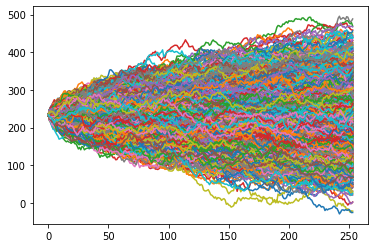

Monte Carlo price:  21.424818153323486
Black scholes price:  21.867841025653433


In [4]:
# Monte Carlo (No-dividend stocks)
# Put/Call
# Time to Maturity(TTM) is expressed as unit of years
def monteCarloOptionPricing(stockPrice,strikePrice,riskfree,sd,TTM,isCall):

  # Simulate with Geometric Brownian Motion
  def GeometricBrownian(stockPrice,riskfree,sd,timeInterval,TTM):
    priceList=[stockPrice]
    currentPrice=stockPrice
    timeToMaturity=TTM
    # Time to maturity must be subtracted by each elapsed interval
    while(timeToMaturity>0):
      # the "drift" expected return factor is replaced by risk-free rate
      # to account for risk-neutral probability
      deltaS=stockPrice*(riskfree*timeInterval+np.random.randn()*sd*np.sqrt(timeInterval))
      currentPrice+=deltaS
      priceList.append(currentPrice)
      timeToMaturity-=timeInterval
    return priceList

  def simulateOptionPrice(stockPrice,riskfree,sd,TTM,iterations):
    # 252 days, stock trading days
    timeInterval=1/252.
    allPriceList=[]
    for i in range(iterations):
        optionPriceModel=GeometricBrownian(stockPrice,riskfree,sd,timeInterval,TTM)
        allPriceList.append(optionPriceModel)
    return allPriceList

  # 5000 models
  priceModels=simulateOptionPrice(stockPrice,riskfree,sd,TTM,5000)


  # In option derivatives, when the option expires there are 2 available outcomes
  # For a call option if the stock price is above the strike price, the spread is your profit
  # For a put option if the strike is above the stock price, the spread is your profit
  # However if the price is equal to the strike price or negative, you gain nothing

  totalProfit=0
  for price in priceModels:
    # Final payoff must be discounted by the risk-free rate compounded by the time to maturity of the option
    futurePrice=price[len(price)-1]
    if(isCall==True):
      # In the case that you gain nothing totalProfit+=0
      # Call option
      if(futurePrice>strikePrice):
        totalProfit+=(futurePrice-strikePrice)/((1+riskfree)**(TTM))
    else:
      # Put option
      if(strikePrice>futurePrice):
        totalProfit+=(strikePrice-futurePrice)/((1+riskfree)**(TTM))

  # Plot simulations
  for prices in priceModels:
    plt.plot(prices)
  plt.show()
  return totalProfit/len(priceModels)
  
# EXAMPLE CALL OPTION
# Microsoft(MSFT) 1-year option
# Stock price = 233.78
# Strike price = 250
# Duration = 1 Year
# Risk free rate (1 Year treasury) = 0.001 (0.1%)
# Volatility = 0.3036 (30.36%)
# https://www.barchart.com/stocks/quotes/MSFT/options

price1 = monteCarloOptionPricing(233.78,250,0.001,0.3036,1,True)
print("Monte Carlo price: ",price1)
price2 = blackScholes(233.78,250,0.001,0.3036,1)
print("Black scholes price: ",price2)
